# Problem Set 3

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt

In [4]:
#a

# Set up the parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)
eps_vec = np.array([-1.4, -0.55, 0, 0.55, 1.4])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

def util_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    
    return util

def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    
    return neg_Vtp1

In [6]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    Exp_V = V_init @ eps_prob.reshape((eps_size,1))
    
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 3288.9775602179398
VF_iter= 3 , VF_dist= 4368.033199294504
VF_iter= 4 , VF_dist= 5171.123172733101
VF_iter= 5 , VF_dist= 5690.816865389136
VF_iter= 6 , VF_dist= 5962.334129328155
VF_iter= 7 , VF_dist= 6029.410863441401
VF_iter= 8 , VF_dist= 5938.006359170556
VF_iter= 9 , VF_dist= 5728.733568262043
VF_iter= 10 , VF_dist= 5436.089591828773
VF_iter= 11 , VF_dist= 5088.450567375278
VF_iter= 12 , VF_dist= 4708.595711207952
VF_iter= 13 , VF_dist= 4314.425870978352
VF_iter= 14 , VF_dist= 3919.6529865086823
VF_iter= 15 , VF_dist= 3534.453890340005
VF_iter= 16 , VF_dist= 3166.0717799094914
VF_iter= 17 , VF_dist= 2819.3724059115366
VF_iter= 18 , VF_dist= 2497.331372214219
VF_iter= 19 , VF_dist= 2201.4557625475145
VF_iter= 20 , VF_dist= 1932.1399178953566
VF_iter= 21 , VF_dist= 1688.9596638065682
VF_iter= 22 , VF_dist= 1470.9108719157662
VF_iter= 23 , VF_dist= 1276.5993702275612
VF_iter= 24 , VF_dist= 1104.3893159739218
VF_iter= 25 , V

Text(0.5, 1.0, 'Equilibrium value function')

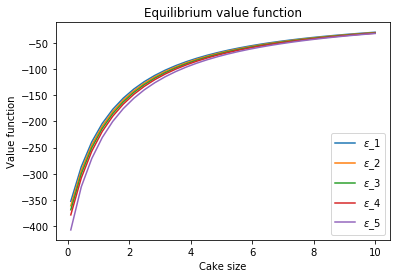

In [7]:
#b

#plot the equilibrium value function
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='$\epsilon$_{}'.format(i+1))
plt.xlabel('Cake size')
plt.ylabel('Value function')
plt.legend()
plt.title('Equilibrium value function')

Text(0.5, 1.0, 'Equilibrium policy function')

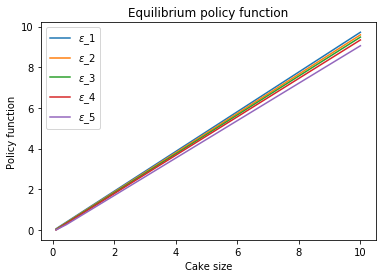

In [8]:
#c

#plot the equilibrium policy function 
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], label='$\epsilon$_{}'.format(i+1))
plt.xlabel('Cake size')
plt.ylabel('Policy function')
plt.legend()
plt.title('Equilibrium policy function')

### Problem 2

In [9]:
#a

trans_mat = np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
                     [0.20, 0.40, 0.20, 0.13, 0.17],
                     [0.10, 0.20, 0.40, 0.20, 0.20],
                     [0.07, 0.13, 0.20, 0.40, 0.20],
                     [0.04, 0.10, 0.18, 0.28, 0.4]])

In [10]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    

    for eps_ind in range(eps_size):  
        trans_mat_ind = trans_mat[eps_ind,:]
        Exp_V = V_init@trans_mat_ind.reshape((eps_size,1))
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 5608.663059236116
VF_iter= 3 , VF_dist= 7653.926960666161
VF_iter= 4 , VF_dist= 9620.261457778537
VF_iter= 5 , VF_dist= 11315.959579696404
VF_iter= 6 , VF_dist= 12716.707171693883
VF_iter= 7 , VF_dist= 13834.318871457992
VF_iter= 8 , VF_dist= 14685.961892700821
VF_iter= 9 , VF_dist= 15293.302835129009
VF_iter= 10 , VF_dist= 15680.312511143615
VF_iter= 11 , VF_dist= 15871.76017490482
VF_iter= 12 , VF_dist= 15892.304062795705
VF_iter= 13 , VF_dist= 15765.808587292924
VF_iter= 14 , VF_dist= 15514.854112942954
VF_iter= 15 , VF_dist= 15160.421028860375
VF_iter= 16 , VF_dist= 14721.710786847618
VF_iter= 17 , VF_dist= 14216.070263679598
VF_iter= 18 , VF_dist= 13658.991232270786
VF_iter= 19 , VF_dist= 13064.161397071915
VF_iter= 20 , VF_dist= 12443.550013327907
VF_iter= 21 , VF_dist= 11807.515721163027
VF_iter= 22 , VF_dist= 11164.92711835134
VF_iter= 23 , VF_dist= 10523.289383017907
VF_iter= 24 , VF_dist= 9888.87214473322
VF_iter= 

VF_iter= 192 , VF_dist= 2.1368374484286343e-05
VF_iter= 193 , VF_dist= 1.8854381091211918e-05
VF_iter= 194 , VF_dist= 1.6635569803058567e-05
VF_iter= 195 , VF_dist= 1.4677366533073405e-05
VF_iter= 196 , VF_dist= 1.2949238937691089e-05
VF_iter= 197 , VF_dist= 1.1424223774937617e-05
VF_iter= 198 , VF_dist= 1.0078509802845878e-05
VF_iter= 199 , VF_dist= 8.891069623119587e-06
VF_iter= 200 , VF_dist= 7.843334669961878e-06


Text(0.5, 1.0, 'Equilibrium value function')

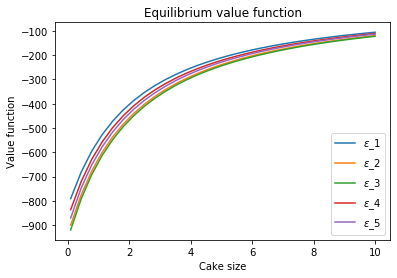

In [12]:
#b

#plot the equilibrium value function
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='$\epsilon$_{}'.format(i+1))
plt.xlabel('Cake size')
plt.ylabel('Value function')
plt.legend()
plt.title('Equilibrium value function')

Text(0.5, 1.0, 'Equilibrium policy function')

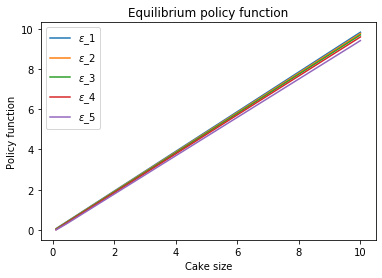

In [13]:
#c

#plot the equilibrium policy function 
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], label='$\epsilon$_{}'.format(i+1))
plt.xlabel('Cake size')
plt.ylabel('Policy function')
plt.legend()
plt.title('Equilibrium policy function')